In [ ]:
!pip install pandas seaborn matplotlib scikit-learn gensim eli5 tiktoken spacy gensim wordcloud datasets

In [6]:
from datasets import load_dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tiktoken
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, r2_score
from sklearn.linear_model import LogisticRegression

***Récuperation et découpage du dataset***
https://huggingface.co/datasets/yaful/DeepfakeTextDetect

In [7]:
dataset = load_dataset("yaful/DeepfakeTextDetect")
df = dataset["train"].to_pandas()
df

,text,label,src
0,White girls very rarely date Asian men. Even i...,1,cmv_human
1,I am a 23 year old male Indian American male. ...,1,cmv_human
2,"Take three people, Persons A, B, and C. They l...",1,cmv_human
3,(A) Work part-time in high school; Then go to ...,1,cmv_human
4,When police introduce a new form of speed prev...,1,cmv_human
...,...,...,...
319066,Noisy Intermediate-Scale Quantum (NISQ) machin...,1,sci_gen_human
319067,Recent years have seen rising needs for locati...,1,sci_gen_human
319068,The ongoing neural revolution in machine trans...,1,sci_gen_human
319069,Let D be a set of n pairwise disjoint unit dis...,1,sci_gen_human


In [8]:
# Fonctions de tokenisation
def byte_pair_tokenize(doc):
    enc = tiktoken.encoding_for_model("gpt-4")
    tokens = enc.encode(doc)
    return [str(token) for token in tokens]

def lemma_tokenize(doc):
    wnl = WordNetLemmatizer()
    return [wnl.lemmatize(t) for t in word_tokenize(doc)]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=69)

# Création du modèle de Machine Learning
model = make_pipeline(CountVectorizer(tokenizer=byte_pair_tokenize, lowercase=True, ngram_range=(3, 3)), LogisticRegression(random_state=69, solver="liblinear",penalty = 'l2'))

**Entrainement du modèle**

In [10]:
model.fit(X_train, y_train)

C:\Users\craft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\craft\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('countvectorizer',
                 CountVectorizer(ngram_range=(3, 3),
                                 tokenizer=<function lemma_tokenize at 0x0000017A913207C0>)),
                ('logisticregression',
                 LogisticRegression(random_state=69, solver='liblinear'))])

***Prédiction du modèle sur le jeu de test***

In [11]:
y_pred_test = model.predict(X_test)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred_test, target_names=['IA', 'Humain']))
print("R2 Score: ", r2_score(y_test, y_pred_test))

Test Set Classification Report:
               precision    recall  f1-score   support

          IA       0.94      0.98      0.95     45082
      Humain       0.93      0.84      0.88     18733

    accuracy                           0.94     63815
   macro avg       0.93      0.91      0.92     63815
weighted avg       0.93      0.94      0.93     63815

R2 Score:  0.6866380210987882


***Matrice de confusion***

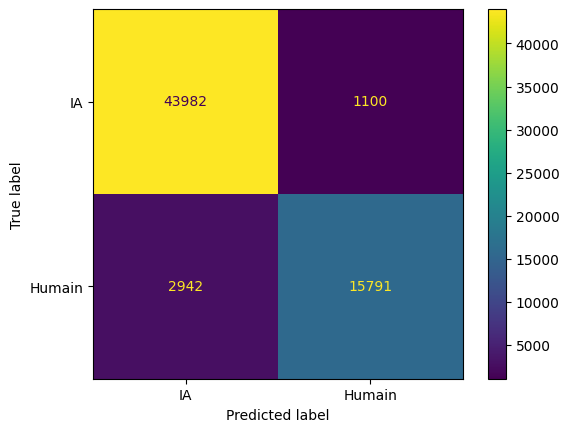

In [9]:
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=['IA', 'Humain'])
disp.plot()
plt.show()

In [10]:
# Utilisation de GridSearch pour l'optimisation des hyperparamètres
model = make_pipeline(CountVectorizer(tokenizer=byte_pair_tokenize), LogisticRegression(random_state=69, solver="liblinear",penalty = 'l2'))

# Hyperparamètres à tester
param_grid = {
    'countvectorizer__ngram_range': [(1, 1), (2, 2), (3, 3)],
}

# Entraînement du modèle avec GridSearch
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score:", test_score)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
